In [1]:
from wog_overview import WOGLevel1, WOGLevel2, WOGLevel2Benchmark, WOGLevel2Trend
from agency_performance import AgencyPerformanceLevel1, AgencyPerformanceLevel2, AgencyCostCategoryBreakdown
from IPython.core.display import display, HTML
from data_processing import build_dataframes, rcache
import pandas as pd

In [2]:
filter_params = {
    'Agency name': [],
    'Financial Year': ['2015-16', '2016-17'],
    'Agency size': [],
    'ASL': 'True',
    'Level 1 Service': ['Corporate Services Functions', 'Human Resource Services Functions', 'Financial Services Functions'],
}

cache_key = 'wog_overview_1'
if not rcache.exists(cache_key):
    build_dataframes()
input_df = pd.read_msgpack(rcache.get(cache_key))

chart = WOGLevel1(filter_params)
dfs = chart.generate_dataframe(input_df)
results = chart.generate_graph(dfs, interactive=True)

if results['image']:
    display(HTML(results['image']))
    
print('Success: %s' % results['success'])
print('Errors: %s' % results['errors'])

,2015-16,2016-17
Extra Large agencies,2,0
Large agencies,17,0
Medium agencies,18,2
Small agencies,0,0
Extra Small agencies,14,0
Micro,1,0
Total cost,52,2


Success: True
Errors: []


In [3]:
filter_params = {
    'Agency name': ['Some organisation1'],
    'Financial Year': ['2014-15', '2015-16'],
    'Agency size': [],
    'Level 1 Service': ['Financial Services Functions'],
    'Level 2 Service': [
        'Accounts Payable',
        'Accounts Receivable',
        'Asset Management',
        'Budgeting',
        'Credit Card Management'
    ]
}

cache_key = 'wog_overview_1'
if not rcache.exists(cache_key):
    build_dataframes()
input_df = pd.read_msgpack(rcache.get(cache_key))

chart = WOGLevel2(filter_params)
df = chart.generate_dataframe(input_df)
print(df)
results = chart.generate_graph(df, interactive=True)

if results['image']:
    display(HTML(results['image']))

print('Success: %s' % results['success'])
print('Errors: %s' % results['errors'])

  Financial Year            Service name  Sum of Total
0        2014-15        Accounts Payable  6.810835e+04
1        2014-15     Accounts Receivable  5.672480e+04
2        2014-15        Asset Management  5.595304e+03
3        2014-15               Budgeting  4.534125e+04
4        2014-15  Credit Card Management  1.697885e+04
5        2015-16        Accounts Payable  6.479507e+05
6        2015-16     Accounts Receivable  1.710684e+05
7        2015-16        Asset Management  9.560591e+04
8        2015-16               Budgeting  1.211309e+06
9        2015-16  Credit Card Management  1.352105e+05


,Accounts Payable,Accounts Receivable,Asset Management,Budgeting,Credit Card Management
2014-15,"$68,108","$56,725","$5,595","$45,341","$16,979"
2015-16,"$647,951","$171,068","$95,606","$1,211,309","$135,211"


Success: True
Errors: []


In [4]:
filter_params = {
    'Agency name': ['Some organisation1', 'Some organisation2'],
    'Financial Year': ['2015-16'],
    'Agency size': ['Large agencies'],
    'Level 1 Service': ['Financial Services Functions'],
    'Level 2 Service': {
        'Service name': 'Asset Management',
        'Primary unit of measure': 'Active Assets'
    }
}

cache_key = 'wog_overview_2'
if not rcache.exists(cache_key):
    build_dataframes()
input_df = pd.read_msgpack(rcache.get(cache_key))

chart = WOGLevel2Benchmark(filter_params)
dfs = chart.generate_dataframe(input_df)
results = chart.generate_graph(dfs, interactive=True, deidentified=True, browser='safari')

if results['image']:
    for svg in results['image']['subplots']:
        display(HTML(svg))

print('Success: %s' % results['success'])
print('Errors: %s' % results['errors'])

Success: True
Errors: []



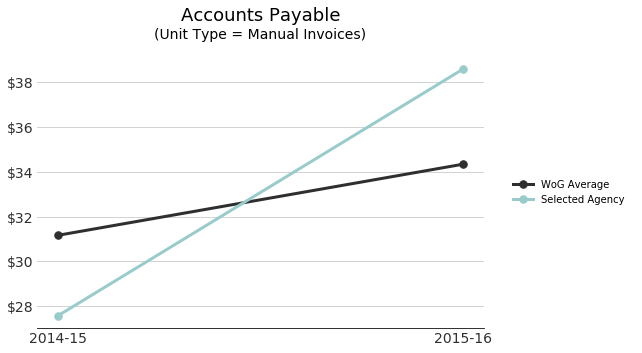

Success: True
Errors: []


In [5]:
filter_params = {
    'Agency name': ['Some organisation44'],
    'Financial Year': ['2014-15', '2015-16'],
    'Agency size': [],
    'Level 1 Service': ['Financial Services Functions'],
    'Level 2 Service': {
        'Service name': 'Accounts Payable',
        'Primary unit of measure': 'Manual Invoices'
    }
}

cache_key = 'wog_overview_2'
if not rcache.exists(cache_key):
    build_dataframes()
input_df = pd.read_msgpack(rcache.get(cache_key))

chart = WOGLevel2Trend(filter_params)
df = chart.generate_dataframe(input_df)
results = chart.generate_graph(df)

if results['image']:
    display(HTML(results['image']))

print('Success: %s' % results['success'])
print('Errors: %s' % results['errors'])

In [6]:
filter_params = {
    'Agency name': ['Some organisation6'],
    'Financial Year': ['2014-15'],
}

chart = AgencyPerformanceLevel1(filter_params)
df = chart.generate_dataframe(input_df)
results = chart.generate_graph(df, interactive=True)

if results['image']:
    display(HTML(results['image']))

print('Success: %s' % results['success'])
print('Errors: %s' % results['errors'])

Success: True
Errors: []


In [7]:
filter_params = {
    'Agency name': ['Some organisation1'],
    'Financial Year': ['2014-15', '2015-16'],
    'Agency size': ['Medium agencies', 'Large agencies'],
    'Level 1 Service': ['Financial Services Functions'],
    'Level 2 Service': [
        'Accounts Payable',
        'Accounts Receivable',
        'Asset Management',
    ]
}

chart = AgencyPerformanceLevel2(filter_params)
df = chart.generate_dataframe(input_df)

results = chart.generate_graph(df, interactive=True)

if results['image']:
    display(HTML(results['image']['legend']))
    for svg in results['image']['subplots']:
        display(HTML(svg))

print('Success: %s' % results['success'])
print('Errors: %s' % results['errors'])

Success: True
Errors: []


In [9]:
filter_params = {
    'Agency name': ['Some organisation51'],
    'Financial Year': ['2014-15', '2015-16'],
    'Agency size': ['Large agencies'],
    'Level 1 Service': ['Financial Services Functions'],
    'Level 2 Service': ['Credit Card Management']
}

chart = AgencyCostCategoryBreakdown(filter_params)
df = chart.generate_dataframe(input_df)
results = chart.generate_graph(df, interactive=False)

if results['image']:
    display(HTML(results['image']))

print('Success: %s' % results['success'])
print('Errors: %s' % results['errors'])

category Consultants - row   Cost category Financial Year    Total Cost
0   Consultants        2014-15  12021.990558
category Contractor Costs - row       Cost category Financial Year    Total Cost
2  Contractor Costs        2014-15  64093.573203
category Employee Costs - row     Cost category Financial Year    Total Cost
4  Employee Costs        2014-15  3.278300e+06
category Other Costs - row   Cost category Financial Year     Total Cost
6   Other Costs        2014-15  133565.708685
category Supplier Costs - row     Cost category Financial Year     Total Cost
8  Supplier Costs        2014-15  618365.026032
category Consultants - row   Cost category Financial Year   Total Cost
1   Consultants        2015-16  9801.450371
category Contractor Costs - row       Cost category Financial Year    Total Cost
3  Contractor Costs        2015-16  90314.316957
category Employee Costs - row     Cost category Financial Year    Total Cost
5  Employee Costs        2015-16  3.504758e+06
category Other 

,2014-15,2015-16
Consultants,"12,021.99","9,801.45"
Contractor Costs,"64,093.57","90,314.32"
Employee Costs,"3,278,300.27","3,504,758.17"
Other Costs,"133,565.71","166,495.71"
Supplier Costs,"618,365.03","751,257.11"


Success: True
Errors: []
